In [1]:
import torch

In [2]:
from sklearn.datasets import make_blobs

/home/ifkash/miniconda3/envs/python310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import plotly.express as px
import pandas as pd

### **Logistic Regression**
$$
\text{input features} = x \\[10pt]
\text{randomly initialized weights (has to match the number of features)} = w \\[10pt]
\text{randomly initialized bias} = x \\[10pt]
z = w \cdot x + b \\
a = \sigma(z) \\
\text{loss} = \mathscr{L}(a, y) \\[10pt]
\mathscr{L} = -\sum(y \cdot \log(a)) \\[10pt]
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
**Gradients**
$$
\frac{\partial \mathscr{L}}{\partial w} = \frac{\partial \mathscr{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w} \\[10pt]
\frac{\partial \mathscr{L}}{\partial b} = \frac{\partial \mathscr{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial b}
$$

In [4]:
X, y = make_blobs(
  n_samples = 5_000,
  centers = 2,
  n_features = 2,
  random_state = 69,
  cluster_std = 0.8
)

In [5]:
X = torch.tensor(X, dtype = torch.float32)

In [6]:
y = torch.tensor(y, dtype = torch.float32)

In [7]:
X_df = pd.DataFrame(X)

In [8]:
y_df = pd.DataFrame(y)

In [9]:
fig = px.scatter(X_df, 0, 1, color_discrete_sequence = y_df)
fig.show()

In [10]:
class LogReg(torch.nn.Module):
  def __init__(self, num_features, num_outputs):
    super().__init__()
    self.linear = torch.nn.Linear(num_features, num_outputs)

  def forward(self, x):
    z = self.linear(x)
    return torch.sigmoid(z)

In [11]:
epochs = 15
logreg = LogReg(X.shape[1], len(y.shape))
optimizer = torch.optim.SGD(logreg.parameters(), lr = 0.01)

In [198]:
for _ in logreg.named_parameters():
  print(_)

('linear.weight', Parameter containing:
tensor([[ 0.6778, -0.3834]], requires_grad=True))
('linear.bias', Parameter containing:
tensor([0.1001], requires_grad=True))


In [12]:
for epoch in range(epochs):
  logreg = logreg.train()

  for x_, y_ in zip(X, y):
    preds = logreg(x_)
    loss = torch.nn.functional.binary_cross_entropy(preds, y_.view(preds.shape))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch: {epoch + 1}\tLoss: {loss:.3f}')

Epoch: 1	Loss: 0.834
Epoch: 2	Loss: 0.813
Epoch: 3	Loss: 0.795
Epoch: 4	Loss: 0.780
Epoch: 5	Loss: 0.767
Epoch: 6	Loss: 0.756
Epoch: 7	Loss: 0.746
Epoch: 8	Loss: 0.738
Epoch: 9	Loss: 0.730
Epoch: 10	Loss: 0.724
Epoch: 11	Loss: 0.718
Epoch: 12	Loss: 0.713
Epoch: 13	Loss: 0.708
Epoch: 14	Loss: 0.704
Epoch: 15	Loss: 0.701


In [13]:
def plot_boundary(model):
  w1 = model.linear.weight[0][0].detach()
  w2 = model.linear.weight[0][1].detach()
  b = model.linear.bias[0].detach()

  x1_min = -20
  x2_min = (-(w1 * x1_min) - b) / w2

  x1_max = 20
  x2_max = (-(w1 * x1_max) - b) / w2

  return x1_min, x1_max, x2_min, x2_max

In [14]:
import matplotlib.pyplot as plt

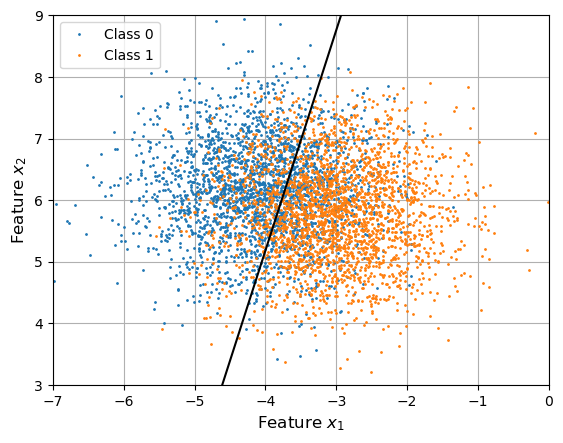

In [15]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(logreg)

plt.plot(
  X[y == 0, 0],
  X[y == 0, 1],
  marker=".",
  markersize=2,
  linestyle="",
  label="Class 0",
)

plt.plot(
  X[y == 1, 0],
  X[y == 1, 1],
  marker=".",
  markersize=2,
  linestyle="",
  label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-7, 0])
plt.ylim([3, 9])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()